In [1]:
# Importando as bibliotecas
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Carregando as imagens já em preto e branco
img_hare = cv2.imread('harewood.jpg', 0)
img_nuts = cv2.imread('nuts.jpg', 0)
img_snow = cv2.imread('snow.jpg', 0)
img_suzy = cv2.imread('suzy_rebeca.jpeg', 0)

In [3]:
# Função para comparar as duas imagens com histograma
def show_img_hist(img1, img2):
    plt.figure(figsize=(20, 5)) 

    plt.subplot(131)
    plt.imshow(img1, cmap="gray", vmin=0, vmax=255)
    plt.title('Imagem Original')
    plt.axis('off')

    plt.subplot(132)
    plt.hist(img1.ravel(), 256)
    plt.title('Histograma')
    plt.axis('off')
    
    plt.subplot(133)
    plt.imshow(img2, cmap="gray", vmin=0, vmax=255)
    plt.title('Imagem Modificada')
    plt.axis('off')

    plt.show()

### 1) Aplique o algoritmo de limiarização do Método de Otsu. Utilize-o nas imagens “harewood.jpg”, “nuts.jpg”, “snow.jpg” e “img_aluno”.

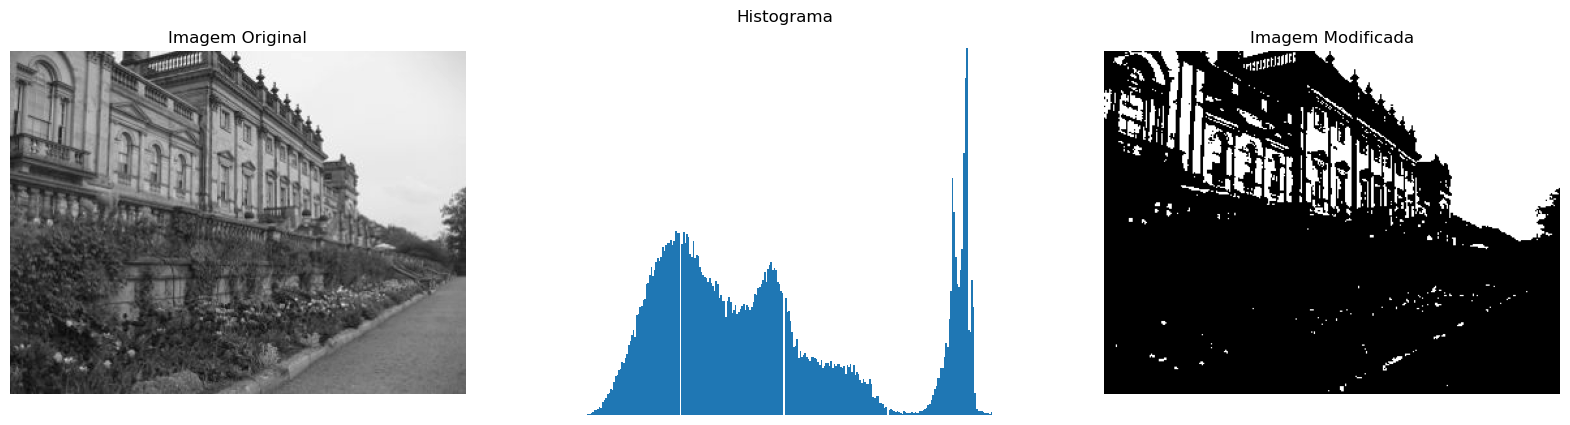

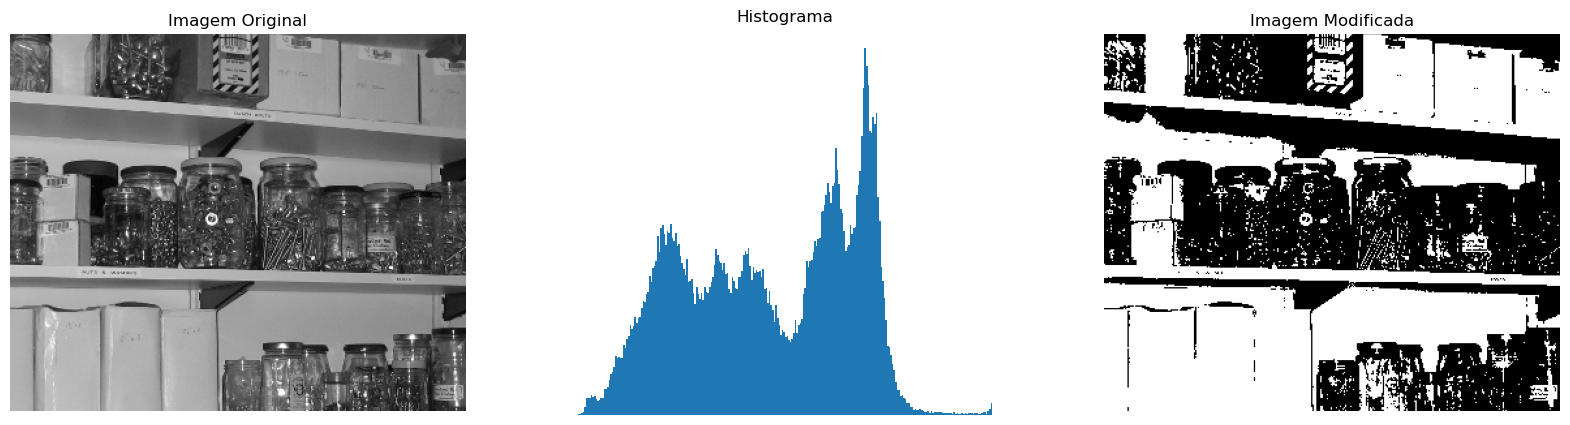

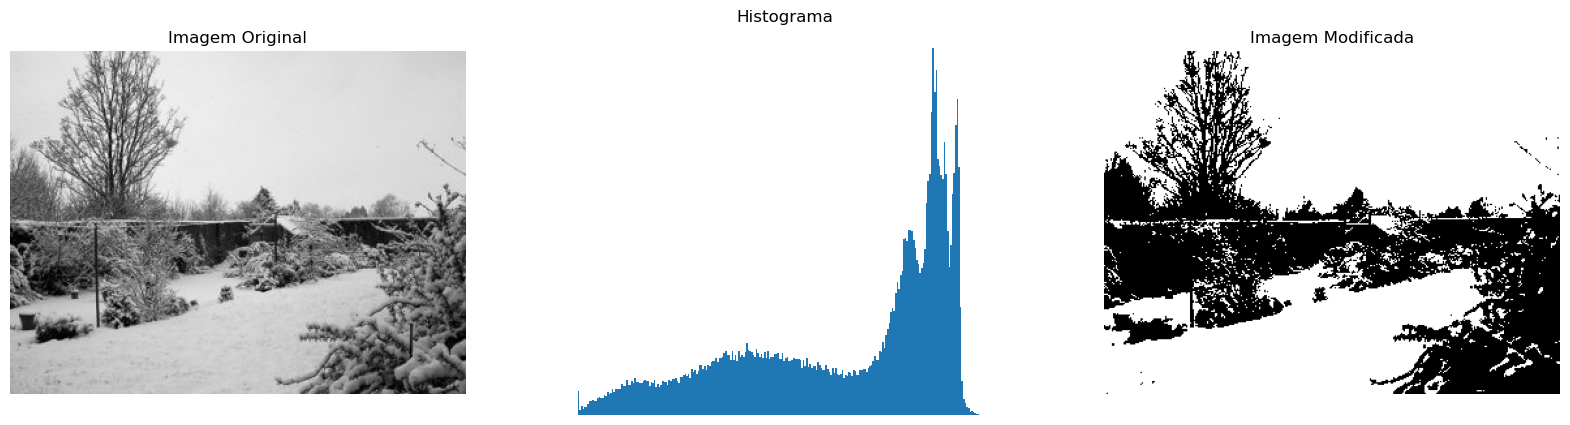

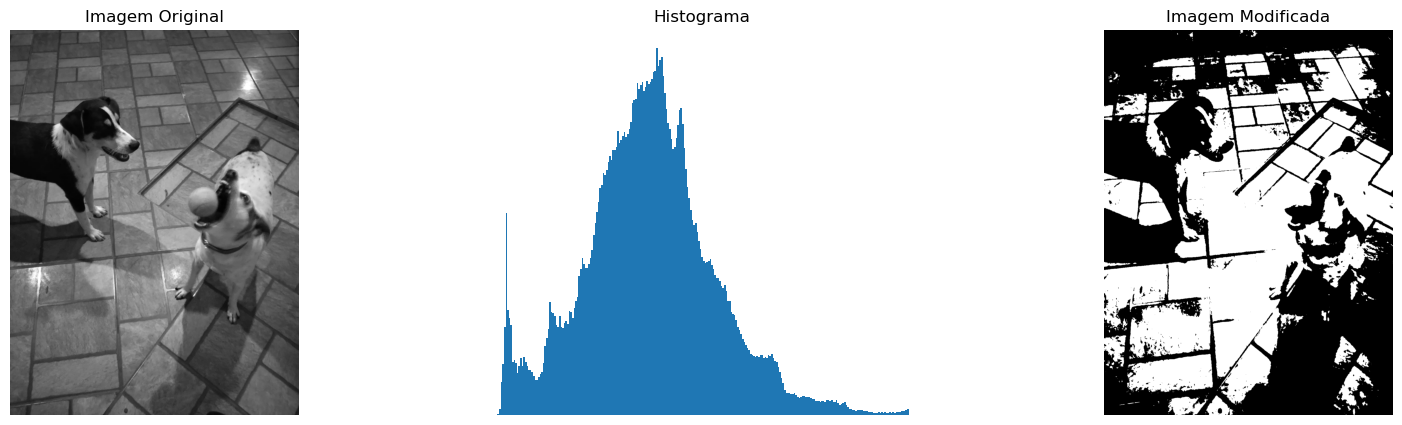

In [4]:
# Aplicando o Otsu Threshold
img_hare_ret, img_hare_th = cv2.threshold(img_hare, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
img_nuts_ret, img_nuts_th = cv2.threshold(img_nuts, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
img_snow_ret, img_snow_th = cv2.threshold(img_snow, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
img_suzy_ret, img_suzy_th = cv2.threshold(img_suzy, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Mostrando as Imagens
show_img_hist(img_hare, img_hare_th)
show_img_hist(img_nuts, img_nuts_th)
show_img_hist(img_snow, img_snow_th)
show_img_hist(img_suzy, img_suzy_th)

### 2) Considere a pasta de atividade_2 que contém imagens de corpo caloso. Fazer o K-means com objetivo de SEGMENTAR apenas as imagens de corpo caloso. 

Para tanto você terá as imagens de corpo caloso original (com destaque em vermelho da região do corpo caloso. Binarize essas imagen. Depois faça a imagem caloso segmentada pelo k-means para comparar se a segmentação foi boa. 

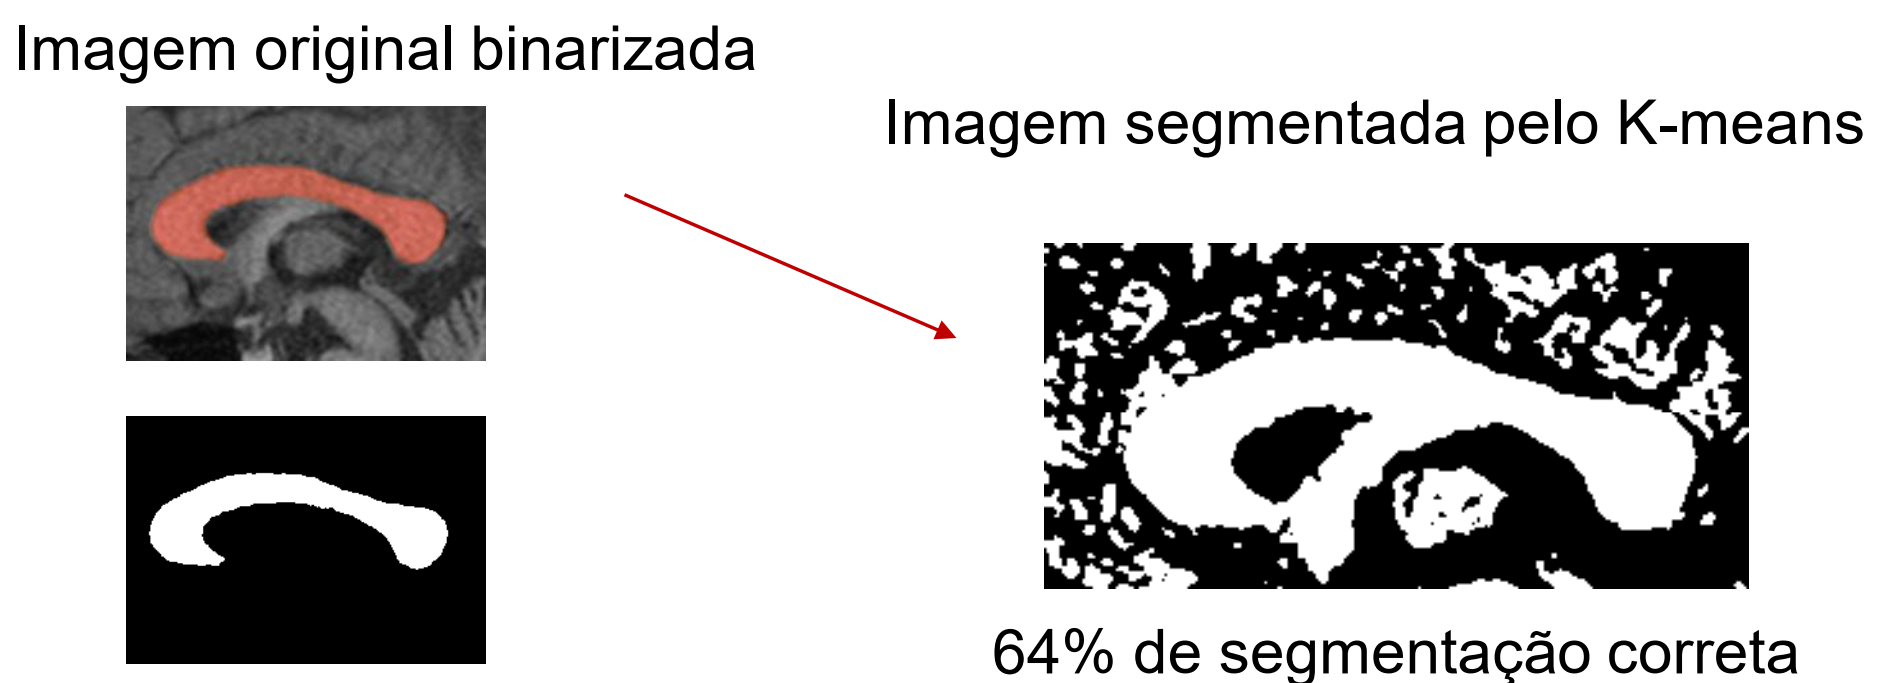

In [5]:
# Função para comparar as duas imagens
def show_img(img1, img2, img3):
    plt.figure(figsize=(20, 20)) 

    plt.subplot(131)
    plt.imshow(img1, cmap="gray", vmin=0, vmax=255)
    plt.title('Imagem Original')
    plt.axis('off')
    
    plt.subplot(132)
    plt.imshow(img2, cmap="gray", vmin=0, vmax=255)
    plt.title('Imagem Segmentada Usando K-Means')
    plt.axis('off')
    
    plt.subplot(133)
    plt.imshow(img3, cmap="gray", vmin=0, vmax=255)
    plt.title('Imagem Retirado os Clusteres')
    plt.axis('off')

    plt.show()

In [6]:
# Carregando as imagens originais e com a sinalização de cor
img1_colo = cv2.imread('atividade_2/Caso_1.png')
img2_colo = cv2.imread('atividade_2/Caso_2.png')
img3_colo = cv2.imread('atividade_2/Caso_3.png')
img4_colo = cv2.imread('atividade_2/Caso_4.png')
img5_colo = cv2.imread('atividade_2/Caso_5.png')

In [7]:
# Achatando as imagens para 2D, visto que cada uma delas tem profundidade 3. E convertendo para float
img1_colo_val = np.float32(img1_colo.reshape((-1, 3)))
img2_colo_val = np.float32(img2_colo.reshape((-1, 3)))
img3_colo_val = np.float32(img3_colo.reshape((-1, 3)))
img4_colo_val = np.float32(img4_colo.reshape((-1, 3)))
img5_colo_val = np.float32(img5_colo.reshape((-1, 3)))

In [8]:
# Difinindo o critério de parada usano para o kmeans
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)

In [9]:
# Chamando a função kmeans do opencv com k = 4
_, labels1, (centers1) = cv2.kmeans(img1_colo_val, 4, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
_, labels2, (centers2) = cv2.kmeans(img2_colo_val, 4, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
_, labels3, (centers3) = cv2.kmeans(img3_colo_val, 4, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
_, labels4, (centers4) = cv2.kmeans(img4_colo_val, 4, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
_, labels5, (centers5) = cv2.kmeans(img5_colo_val, 4, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

In [10]:
# Convertendo os centros e rótulos para interio de 8 bits e array de uma dimensão, respectivamente
centers1 = np.uint8(centers1)
labels1 = labels1.flatten()

centers2 = np.uint8(centers2)
labels2 = labels2.flatten()

centers3 = np.uint8(centers3)
labels3 = labels3.flatten()

centers4 = np.uint8(centers4)
labels4 = labels4.flatten()

centers5 = np.uint8(centers5)
labels5 = labels5.flatten()

In [11]:
# Segmentando a imagem e voltando para as dimensões originais
# Convertendo os centros e rótulos para interio de 8 bits e array de uma dimensão, respectivamente
img1_colo_seg = np.uint8(centers1[labels1.flatten()]).reshape(img1_colo.shape)
img2_colo_seg = np.uint8(centers2[labels2.flatten()]).reshape(img2_colo.shape)
img3_colo_seg = np.uint8(centers3[labels3.flatten()]).reshape(img3_colo.shape)
img4_colo_seg = np.uint8(centers4[labels4.flatten()]).reshape(img4_colo.shape)
img5_colo_seg = np.uint8(centers5[labels5.flatten()]).reshape(img5_colo.shape)

In [12]:
# Copiando as novas imagens 
img1_colo_mask = np.float32(img1_colo.reshape((-1, 3)))
img2_colo_mask = np.float32(img2_colo.reshape((-1, 3)))
img3_colo_mask = np.float32(img3_colo.reshape((-1, 3)))
img4_colo_mask = np.float32(img4_colo.reshape((-1, 3)))
img5_colo_mask = np.float32(img5_colo.reshape((-1, 3)))

In [13]:
# Desabilitando os clusteres (sempre que mudar recompilar quadro acima)
# Vai mudar a cada compilação, deve-se achar os melhor valores de 1 à 3 para serem retirados do rótulo
img1_colo_mask[labels1 == 0] = [0, 0, 0]
img1_colo_mask[labels1 == 1] = [0, 0, 0]
img1_colo_mask[labels1 == 3] = [0, 0, 0]

img2_colo_mask[labels2 == 0] = [0, 0, 0]
img2_colo_mask[labels2 == 1] = [0, 0, 0]
img2_colo_mask[labels2 == 2] = [0, 0, 0]

img3_colo_mask[labels3 == 1] = [0, 0, 0]
img3_colo_mask[labels3 == 2] = [0, 0, 0]
img3_colo_mask[labels3 == 3] = [0, 0, 0]

img4_colo_mask[labels4 == 0] = [0, 0, 0]
img4_colo_mask[labels4 == 2] = [0, 0, 0]
img4_colo_mask[labels4 == 3] = [0, 0, 0]

img5_colo_mask[labels5 == 1] = [0, 0, 0]
img5_colo_mask[labels5 == 2] = [0, 0, 0]
img5_colo_mask[labels5 == 3] = [0, 0, 0]

In [14]:
# Convertendo para o tamanho original e passando para inteiro
img1_colo_mask = np.uint8(img1_colo_mask).reshape(img1_colo.shape)
img2_colo_mask = np.uint8(img2_colo_mask).reshape(img2_colo.shape)
img3_colo_mask = np.uint8(img3_colo_mask).reshape(img3_colo.shape)
img4_colo_mask = np.uint8(img4_colo_mask).reshape(img4_colo.shape)
img5_colo_mask = np.uint8(img5_colo_mask).reshape(img5_colo.shape)

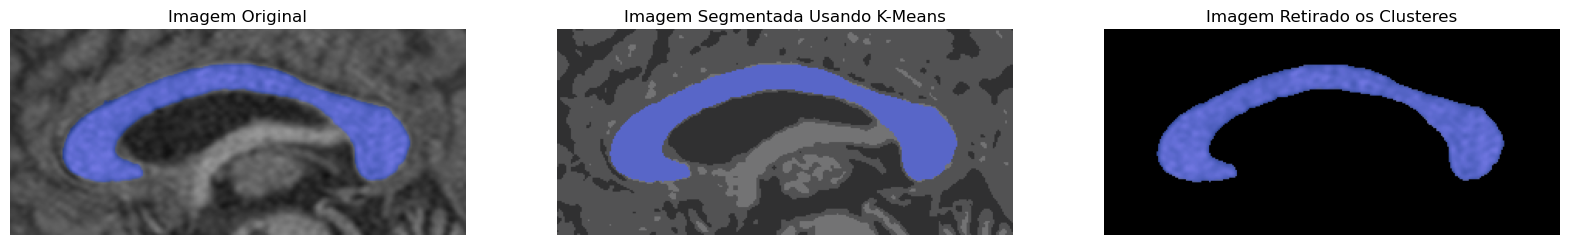

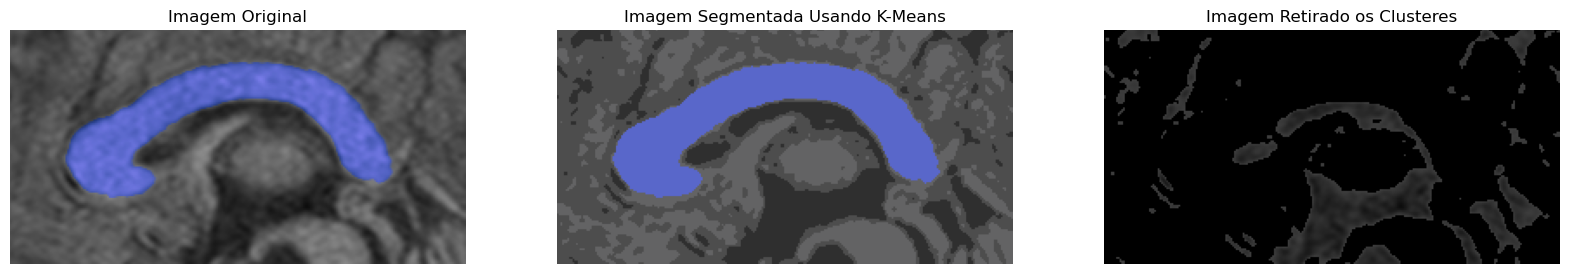

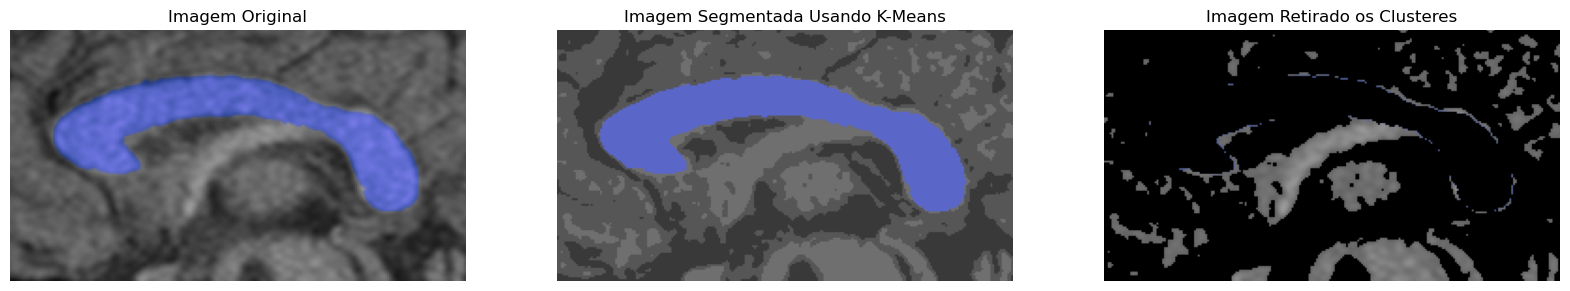

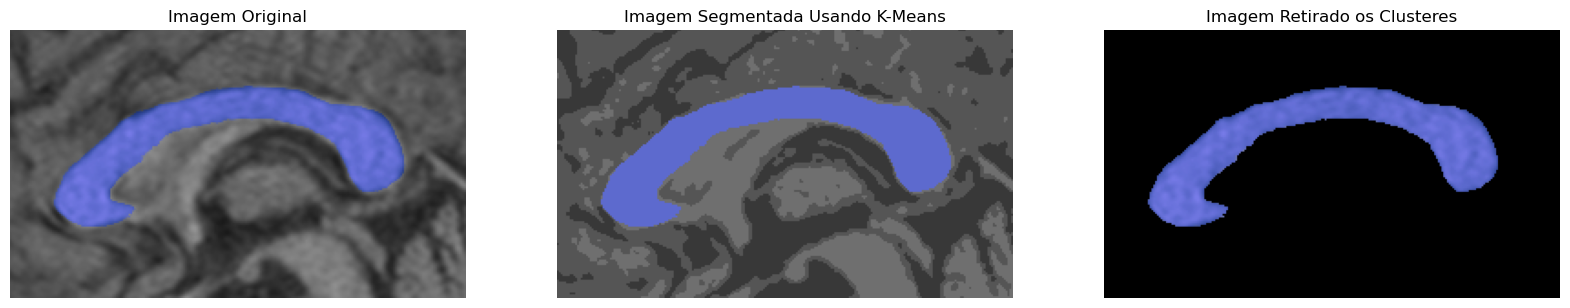

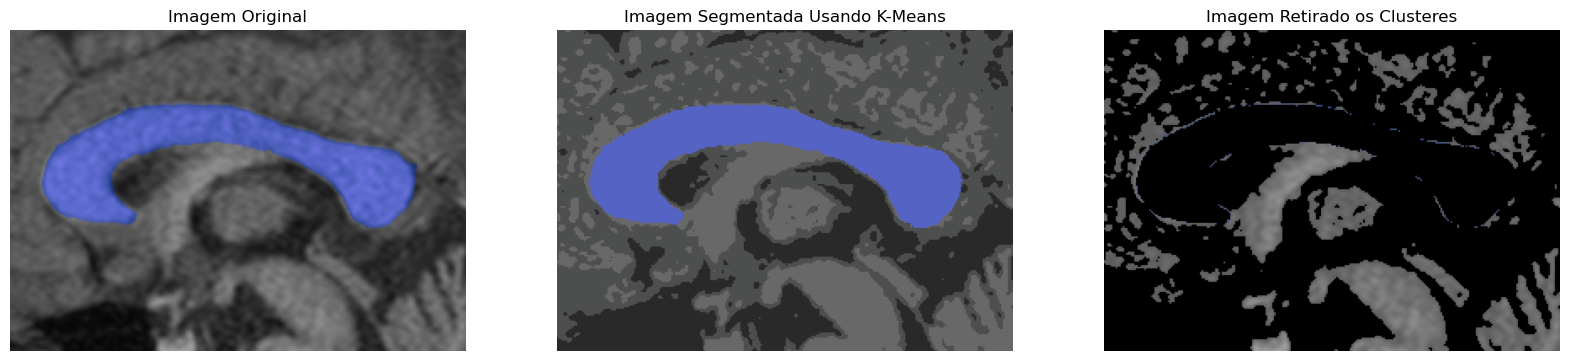

In [15]:
# Comparando as imagens
show_img(img1_colo, img1_colo_seg, img1_colo_mask)
show_img(img2_colo, img2_colo_seg, img2_colo_mask)
show_img(img3_colo, img3_colo_seg, img3_colo_mask)
show_img(img4_colo, img4_colo_seg, img4_colo_mask)
show_img(img5_colo, img5_colo_seg, img5_colo_mask)